In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import matplotlib.pyplot as plt

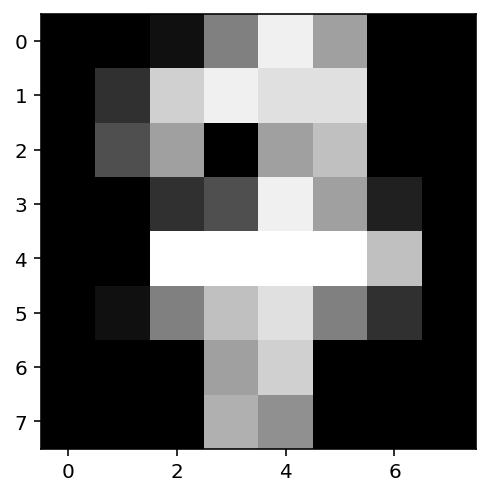

In [5]:
idx = 17
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [6]:
digits['target'][idx]

7

In [7]:
digits['images'].shape

(1797, 8, 8)

In [8]:
digits['data'].shape

(1797, 64)

The 'data' array contains all the images, but flattened into an array of shape (64,).

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.
/Users/mattwilliams/anaconda3/envs/pfds37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mattwilliams/anaconda3/envs/pfds37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mattwilliams/anaconda3/envs/pfds37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [10]:
X = digits['data']
y = digits['target']

In [11]:
y = np_utils.to_categorical(y, num_classes=10)

In [12]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [18]:
model = Sequential([
    Dense(128, input_shape=(in_dim,)),
    Activation('relu'),
    Dense(out_dim),
    Activation('sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1257/1257 [==============================] - 0s 45us/step - loss: 0.9312 - accuracy: 0.6738
Epoch 2/10
1257/1257 [==============================] - 0s 35us/step - loss: 0.2726 - accuracy: 0.9204
Epoch 3/10
1257/1257 [==============================] - 0s 30us/step - loss: 0.1477 - accuracy: 0.9578
Epoch 4/10
1257/1257 [==============================] - 0s 30us/step - loss: 0.1053 - accuracy: 0.9618
Epoch 5/10
1257/1257 [==============================] - 0s 30us/step - loss: 0.0802 - accuracy: 0.9753
Epoch 6/10
1257/1257 [==============================] - 0s 31us/step - loss: 0.0589 - accuracy: 0.9817
Epoch 7/10
1257/1257 [==============================] - 0s 28us/step - loss: 0.0383 - accuracy: 0.9928
Epoch 8/10
1257/1257 [==============================] - 0s 27us/step - loss: 0.0576 - accuracy: 0.9809
Epoch 9/10
1257/1257 [==============================] - 0s 26us/step - loss: 0.0323 - accuracy: 0.9936
Epoch 10/10
1257/1257 [==============================] - 0s 26us/step - l

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

540/540 [==============================] - 0s 66us/step


0.9722222089767456

In [23]:
model.predict(X_test[:3])

array([[4.9927562e-01, 0.0000000e+00, 0.0000000e+00, 1.4901161e-06,
        2.9802322e-07, 1.4895499e-03, 3.5762787e-07, 4.6193600e-06,
        4.9769878e-06, 2.3543835e-06],
       [0.0000000e+00, 1.4901161e-07, 8.9406967e-08, 8.5295796e-01,
        0.0000000e+00, 7.6293945e-06, 0.0000000e+00, 2.0861626e-06,
        1.1026859e-06, 8.3148479e-06],
       [1.1920929e-07, 1.7300248e-04, 0.0000000e+00, 8.9406967e-08,
        9.5045882e-01, 3.8431318e-07, 4.0983365e-04, 1.7233589e-06,
        4.3279538e-06, 1.1810833e-10]], dtype=float32)

In [25]:
model.predict(X_test[:3]).shape

(3, 10)

In [26]:
model.predict(X_test[:3]).argmax(axis=1)

array([0, 3, 4])

In [27]:
y_test[:3].argmax(axis=1)

array([0, 3, 4])

In [28]:
model.save('model.h5')